# Вычислительный модуль к курсовой работе по дисциплине "Вычислительная математика"

## Уравнение Кортевега- де Фриза

## Выполнил Косиков В. В., гр. 716

Подробные теоретические рассуждения и выводы касательно этой работы рассмартиваются в основном файле, тут я только провожу вычисления и объясняю работу всех ячеек.

In [1]:
#импорт зависимостей
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import max_error

## Один солитон

### Точное решение

In [2]:
#создадим пространственную сетку
x = np.linspace(-10, 10, 81)

In [3]:
#напишем функцию для точного вычисления значения функции в зависимости от момента времени и точки пространства
def one_solit(x, t):
    c = 2
    in_brackets = (np.sqrt(c)/2)*(x - c*t)
    answer = (-c/2)*(np.cosh(in_brackets))**(-2)
    return answer

In [4]:
#зададим начальное условие
u_0 = one_solit(x, 0)

Text(0.5, 1.0, 'Начальное условие')

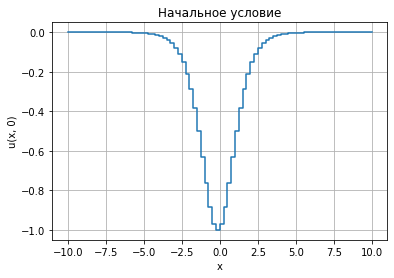

In [5]:
#визуализируем начальное условие
plt.step(x, np.squeeze(u_0))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0)')
plt.title('Начальное условие')

In [6]:
#чтобы было, с чем сравнивать визуально, рассмотрим момент времени 0.7с
u_07 = one_solit(x, 0.7)

Text(0.5, 1.0, 'Решение в момент времени 0.7с')

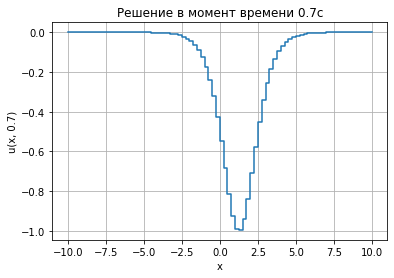

In [7]:
plt.step(x, np.squeeze(u_07))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0.7)')
plt.title('Решение в момент времени 0.7с')


### Схема

In [8]:
#cоздаем пространственную и временную сетки
x = np.linspace(-10, 10, 81)
h = x[1] - x[0]
dt = 0.0001
T = 1.0

Cхема:
$$\frac{u_{m}^{n+1} - u_{m}^{n}}{\tau} = \frac{3(u_{m+1})^2 - 3(u_{m-1})^2}{2h} - 
\frac{u_{m+2} - 2u_{m+1} + 2u_{m-1} - u_{m-2}}{2h^3}$$

In [9]:
#создаем массив
sol = np.zeros((int(T/dt), len(x)))
sol[0] = u_0

In [10]:
side = np.zeros((int(T/dt), 2))
sol = np.concatenate((side, sol), axis=1)
sol = np.concatenate((sol, side), axis=1)

In [11]:
#создаем функцию для вычисления по схеме
def calculate(dt, dx, a, b, c, d, e):
    ans = c + (dt/(2*dx))*(3*(d**2) - 3*(b**2)) - (dt/(2*dx**3))*(e - 2*d + 2*b - a)
    return ans

In [12]:
def first_integral(arr, h):
    integral = 0
    for i in arr:
        integral += i*h
    return integral

In [13]:
def second_integral(arr, h):
    integral= 0
    for i in arr:
        integral += (i**2)*h
    return integral

In [14]:
def fourth_integral(arr, h):
    integral = 0
    for i in range(1, len(arr)-1):
        u_x = (arr[i+1] - arr[i-1])/(2*h)
        integral += (arr[i]**3) + 0.5*(u_x**2)
    return integral

In [15]:
def checking_for_integrals(space, h, x):
    a, b = space.shape
    first_integrals = np.zeros(a)
    second_integrals = np.zeros(a)
    fourth_integrals = np.zeros(a)
    for i in range(a):
        array = space[i, 3 : b-2]
        first_integrals[i] = first_integral(array, h)
        second_integrals[i] = second_integral(array, h)
        fourth_integrals[i] = fourth_integral(array, h)
    plt.plot(x, first_integrals, 'r', x, second_integrals, 'g', x, fourth_integrals, 'b')
    plt.xlabel('t')
    plt.ylabel('Значение интеграла')
    plt.title('Демонстрация сохранения интеграла')
    plt.legend(['Первый интеграл', 'Второй интеграл', 'Четвертый интеграл'])
    plt.grid()
    plt.show
    print('Для первого интеграла: ')
    print(' Среднее значение: ', np.mean(first_integrals))
    print(' Среднеквадратичное отклонение: ', np.std(first_integrals))
    print('Для второго интеграла :')
    print(' Среднее значение: ', np.mean(second_integrals))
    print(' Среднеквадратичное отклонение: ', np.std(second_integrals))
    print('Для четвертого интеграла :' )
    print(' Среднее значение: ', np.mean(fourth_integrals))
    print(' Среднеквадратичное отклонение: ', np.std(fourth_integrals))

In [16]:
#собственно проводим вычисления
t, x = sol.shape
for i in range(1, t):
    for j in range(3, x-2):
        sol[i, j] = calculate(dt, h, sol[i-1, j-2], sol[i-1, j-1], sol[i-1, j], \
                             sol[i-1, j+1], sol[i-1, j+2])

In [17]:
sol025 = sol.copy()

Для первого интеграла: 
 Среднее значение:  -2.8283239523216337
 Среднеквадратичное отклонение:  0.00020603521104519074
Для второго интеграла :
 Среднее значение:  1.8857701481402007
 Среднеквадратичное отклонение:  9.69159237755255e-05
Для четвертого интеграла :
 Среднее значение:  -4.570099563986234
 Среднеквадратичное отклонение:  0.00028935196067769514


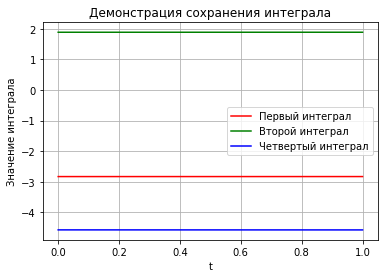

In [18]:
checking_for_integrals(sol, h, np.linspace(0, 1, 10000))

Text(0.5, 1.0, 'Численное решение в момент времени 0.7c')

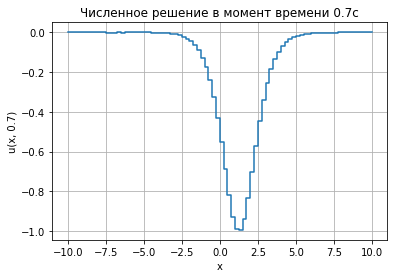

In [19]:
x = np.linspace(-10, 10, 81)
arr = sol[6999]
arr = arr[2:83]
plt.step(x, np.squeeze(arr))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0.7)')
plt.title('Численное решение в момент времени 0.7c')

In [20]:
#найдем среднеквадратичную ошибку в момент времени 0.7с
from sklearn.metrics import mean_squared_error as mse

print('Cреднеквадратичная ошибка: ', mse(arr, u_07))

Cреднеквадратичная ошибка:  2.79714617847547e-06


In [21]:
print('Погрешность равна: ', max_error(arr, u_07))

Погрешность равна:  0.005498819373084385


## Два солитона

Все аналогичные действия провернем с ситуацией, когда нашим решением являются 2 солитона

In [22]:
def two_solit(x, t):
    return -6*(np.cosh(x))**(-2)

In [23]:
u_0 = two_solit(x, 0)

Text(0.5, 1.0, 'Начальные условия при 2х солитонах')

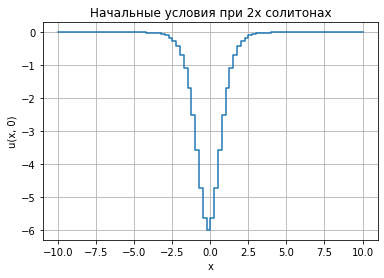

In [24]:
plt.step(x, np.squeeze(u_0))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0)')
plt.title('Начальные условия при 2х солитонах')

In [25]:
#точное решение
def two_solit_exact(x, t):
    chisl = 4*np.cosh(2*x - 8*t) + np.cosh(4*x-64*t) + 3
    znam = (3*np.cosh(x-28*t) + np.cosh(3*x-36*t))**2
    return -12*(chisl/znam)

Text(0.5, 1.0, 'Точное решение в момент времени 0.3c')

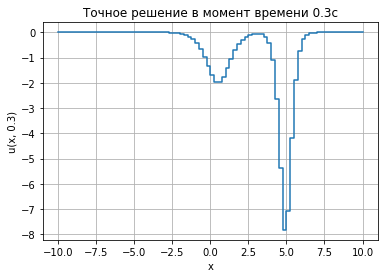

In [26]:
exact_sol_03 = two_solit_exact(x, 0.3)
plt.step(x, np.squeeze(exact_sol_03))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0.3)')
plt.title('Точное решение в момент времени 0.3c')

In [27]:
sol = np.zeros((int(0.5*T/dt), len(x)))
sol[0] = u_0

In [28]:
side = np.zeros((int(0.5*T/dt), 2))
sol = np.concatenate((side, sol), axis=1)
sol = np.concatenate((sol, side), axis=1)

In [29]:
t, x = sol.shape
for i in range(1, t):
    for j in range(3, x-2):
        sol[i, j] = calculate(dt, h, sol[i-1, j-2], sol[i-1, j-1], sol[i-1, j], \
                             sol[i-1, j+1], sol[i-1, j+2])

Для первого интеграла: 
 Среднее значение:  -11.999807940274769
 Среднеквадратичное отклонение:  0.000977890828970514
Для второго интеграла :
 Среднее значение:  47.82586241394221
 Среднеквадратичное отклонение:  0.2943484513607763
Для четвертого интеграла :
 Среднее значение:  -896.7090165179733
 Среднеквадратичное отклонение:  22.235925674853032


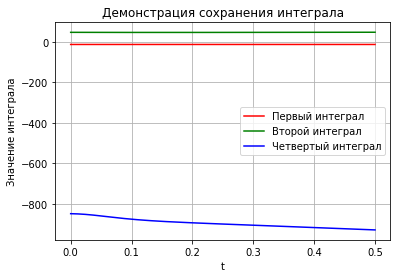

In [30]:
checking_for_integrals(sol, h, np.linspace(0, 0.5, 5000))

Text(0.5, 1.0, 'Численное решение в момент времени 0.3с')

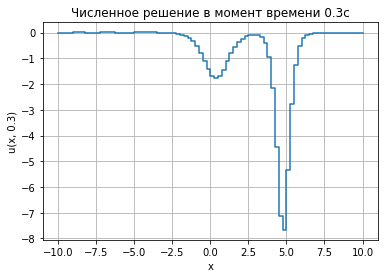

In [31]:
x = np.linspace(-10, 10, 81)
arr = sol[2999]
arr = arr[2:83]
plt.step(x, np.squeeze(arr))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0.3)')
plt.title('Численное решение в момент времени 0.3с')

In [32]:
print('Cреднеквадратичная ошибка: ', mse(arr, exact_sol_03))
print('Погрешность равна: ', max_error(arr, exact_sol_03))

Cреднеквадратичная ошибка:  0.16836294908768407
Погрешность равна:  1.7758493563249402


## Сходимость по правилу Рунге

Найдем сходимость по h

In [33]:
#увеличиваем сетку в 2 раза
x = np.linspace(-10, 10, 41)
h = x[1] - x[0]
dt = 0.0001
T = 1.0

In [34]:
sol = np.zeros((int(T/dt), len(x)))
sol[0] = one_solit(x, 0)

In [35]:
side = np.zeros((int(T/dt), 2))
sol = np.concatenate((side, sol), axis=1)
sol = np.concatenate((sol, side), axis=1)

In [36]:
t, x = sol.shape
for i in range(1, t):
    for j in range(3, x-2):
        sol[i, j] = calculate(dt, h, sol[i-1, j-2], sol[i-1, j-1], sol[i-1, j], \
                             sol[i-1, j+1], sol[i-1, j+2])

In [37]:
sol_05 = sol.copy()

In [38]:
def find_error(arr1, arr2):
    a, b = arr1.shape
    c, d = arr2.shape
    arr1 = arr1[:, 3 : b-2]
    arr2 = arr2[:, 3 : d-2]
    m = 0
    for i in range(a):
        err = max_error(arr2[i], arr1[i, ::2])
        if err > m:
            m = err
    return m/3

In [39]:
print('Погрешность по правилу Рунге равна: ', find_error(sol025, sol_05))

Погрешность по правилу Рунге равна:  0.05144006889969547


In [40]:
#увеличиваем h еще в 2 раза
x = np.linspace(-10, 10, 21)
h = x[1] - x[0]
dt = 0.0001
T = 1.0

In [41]:
sol = np.zeros((int(T/dt), len(x)))
sol[0] = one_solit(x, 0)

In [42]:
side = np.zeros((int(T/dt), 2))
sol = np.concatenate((side, sol), axis=1)
sol = np.concatenate((sol, side), axis=1)

In [43]:
t, x = sol.shape
for i in range(1, t):
    for j in range(3, x-2):
        sol[i, j] = calculate(dt, h, sol[i-1, j-2], sol[i-1, j-1], sol[i-1, j], \
                             sol[i-1, j+1], sol[i-1, j+2])

In [44]:
print('Погрешность по правилу Рунге равна: ', find_error(sol_05, sol))

Погрешность по правилу Рунге равна:  0.12351774220084709


## Неявная схема

Результаты в момент времени 0.7с по неявной схеме подсчитаны в модуле на matlab. Здесь я вручную копирую результаты чтобы сравнить их с точным решением.

In [45]:
matlab_solution = [-0.0001, -0.0004, 0.0002, 0.0003,0.0001,-0.0002,0.0014,0.0003,0.0007,0.0001,-0.0001,\
                   -0.0009,-0.0010,-0.0013, 0.0001,-0.0005,0.0000,0.0003,0.0007,-0.0004,0.0001,0.0003,\
                   -0.0005,-0.0005,-0.0006,-0.0016,-0.0028,-0.0052,-0.0068,-0.0105,-0.0159,-0.0217,-0.0314,\
                   -0.0455,-0.0643,-0.0902,-0.1274,-0.1766,-0.2413,-0.3266,-0.4308,-0.5535,-0.6880,-0.8188,\
                   -0.9270,-0.9901,-0.9948,-0.9383,-0.8348,-0.7056,-0.5702,-0.4462,-0.3387,-0.2520,-0.1854,\
                   -0.1341,-0.0964,-0.0688,-0.0488,-0.0351,-0.0264,-0.0180,-0.0121,-0.0089,-0.0061,-0.0051,-0.0027,\
                   -0.0016,-0.0010,-0.0015,-0.0010,-0.0001,-0.0005,0.0004,0.0010,0.0012,0.0002,0.0001,\
                   -0.0005,0.0001,-0.0001]

In [46]:
mat_sol = np.array(matlab_solution)

In [47]:
x = np.linspace(-10, 10, 81)
print('Cреднеквадратичная ошибка: ', max_error(mat_sol, one_solit(x, 0.7)))

Cреднеквадратичная ошибка:  0.005410032003012044


Видим высокую точность результата

In [48]:
def count_lines(filename, chunk_size=1<<13):
    with open(filename) as file:
        return sum(chunk.count('\n')
                   for chunk in iter(lambda: file.read(chunk_size), ''))

In [49]:
count_lines('matrix.txt')

135000

In [50]:
arr = np.loadtxt('matrix.txt')

In [51]:
arr = np.reshape(arr, (5000, 81))

In [52]:
arr.shape

(5000, 81)

In [53]:
side = np.zeros((5000, 2))
arr = np.concatenate((side, arr), axis=1)
arr = np.concatenate((arr, side), axis=1)

In [54]:
arr.shape

(5000, 85)

После того, как мы выгрузили результат работы неявной схемы из Matlab и привели к нужному виду, проверим ее на сохранение интегралов движения и визулизируем с помощью нашей написанной функции

Для первого интеграла: 
 Среднее значение:  -11.3098218
 Среднеквадратичное отклонение:  0.0024556149453851504
Для второго интеграла :
 Среднее значение:  7.5424318050000005
 Среднеквадратичное отклонение:  0.001588918451203493
Для четвертого интеграла :
 Среднее значение:  -5.943515885488803
 Среднеквадратичное отклонение:  0.002028462398341803


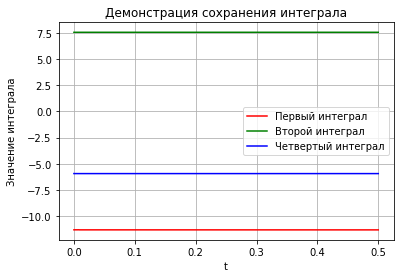

In [55]:
checking_for_integrals(arr, h, np.linspace(0, 0.5, 5000))

## Односолитонное решение на больших расстояниях

In [56]:
x = np.linspace(-30, 30, 241)
h = x[1] - x[0]
dt = 0.0001
T = 1.0

In [57]:
sol = np.zeros((11*int(T/dt), len(x)))
sol[0] = one_solit(x, 0)

In [58]:
side = np.zeros((11*int(T/dt), 2))
sol = np.concatenate((side, sol), axis=1)
sol = np.concatenate((sol, side), axis=1)

In [59]:
t, x = sol.shape
for i in range(1, t):
    for j in range(3, x-2):
        sol[i, j] = calculate(dt, h, sol[i-1, j-2], sol[i-1, j-1], sol[i-1, j], \
                             sol[i-1, j+1], sol[i-1, j+2])

Text(0.5, 1.0, 'Численное решение в момент времени 11c')

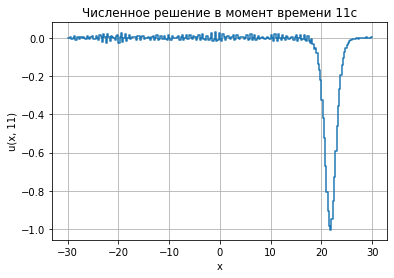

In [60]:
x = np.linspace(-30, 30, 241)
arr = sol[109999]
arr = arr[2:243]
plt.step(x, np.squeeze(arr))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 11)')
plt.title('Численное решение в момент времени 11c')

In [61]:
sol.shape

(110000, 245)

Text(0.5, 1.0, 'Решение в момент времени 0.7с')

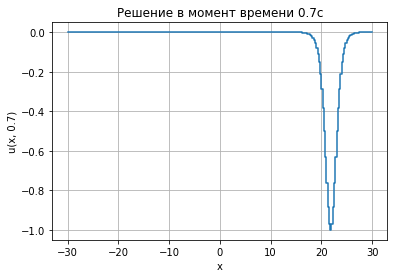

In [62]:
plt.step(x, np.squeeze(one_solit(x, 11)))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0.7)')
plt.title('Решение в момент времени 0.7с')

Для первого интеграла: 
 Среднее значение:  -2.8284862715067103
 Среднеквадратичное отклонение:  0.00025657989388853844
Для второго интеграла :
 Среднее значение:  1.8875388306921816
 Среднеквадратичное отклонение:  0.001472263896430182
Для четвертого интеграла :
 Среднее значение:  -4.570716694002921
 Среднеквадратичное отклонение:  0.01727606530177537


/home/victor/anacondom3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/victor/anacondom3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


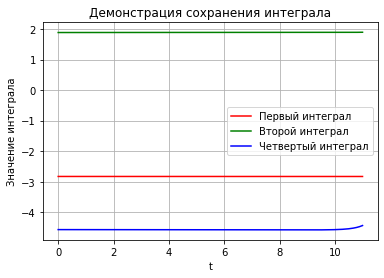

In [63]:
checking_for_integrals(sol, h, np.linspace(0, 11, 110000))

In [64]:
print(max_error(one_solit(x, 11), arr))

0.042954459810444656


## Проверка сходимости односолитонного решения по правилу Рунге

Рассмотрим последовательно сетки с шагом h, 2h, 4h, h/2, чтобы посмотреть сходимость

## 4h

In [102]:
x = np.linspace(-10, 10, 21)
h = x[1] - x[0]
dt = 0.0001 * 8 * 8
T = 1.0

In [103]:
sol = np.zeros((int(T/dt), len(x)))
sol[0] = one_solit(x, 0)
side = np.zeros((int(T/dt), 2))
sol = np.concatenate((side, sol), axis=1)
sol = np.concatenate((sol, side), axis=1)
t, x = sol.shape
for i in range(1, t):
    for j in range(3, x-2):
        sol[i, j] = calculate(dt, h, sol[i-1, j-2], sol[i-1, j-1], sol[i-1, j], \
                             sol[i-1, j+1], sol[i-1, j+2])

In [104]:
sol.shape

(156, 25)

In [105]:
sol1 = sol[110][2:23]

Text(0.5, 1.0, 'Численное решение в момент времени 0.7c')

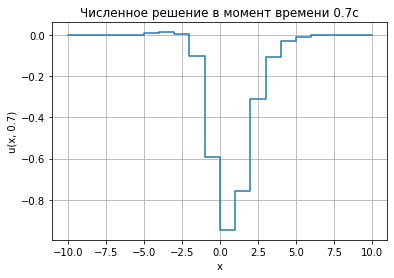

In [107]:
x = np.linspace(-10, 10, 21)
plt.step(x, np.squeeze(sol1))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0.7)')
plt.title('Численное решение в момент времени 0.7c')

### 2h

In [65]:
x = np.linspace(-10, 10, 41)
h = x[1] - x[0]
dt = 0.0001 * 8
T = 1.0

In [66]:
sol = np.zeros((int(T/dt), len(x)))
sol[0] = one_solit(x, 0)

In [67]:
side = np.zeros((int(T/dt), 2))
sol = np.concatenate((side, sol), axis=1)
sol = np.concatenate((sol, side), axis=1)

In [68]:
t, x = sol.shape
for i in range(1, t):
    for j in range(3, x-2):
        sol[i, j] = calculate(dt, h, sol[i-1, j-2], sol[i-1, j-1], sol[i-1, j], \
                             sol[i-1, j+1], sol[i-1, j+2])

In [69]:
sol05 = sol.copy()

In [70]:
sol05.shape

(1250, 45)

Text(0.5, 1.0, 'Численное решение в момент времени 0.7c')

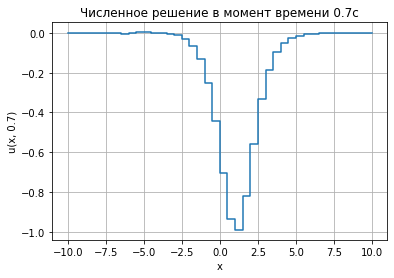

In [71]:
x = np.linspace(-10, 10, 41)
arr = sol[int(1250*0.7)]
arr = arr[2:43]
plt.step(x, np.squeeze(arr))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0.7)')
plt.title('Численное решение в момент времени 0.7c')

In [72]:
sol07_05 = arr

In [73]:
sol07_025 = sol025[6999][2:83]

### h/2

In [74]:
x = np.linspace(-10, 10, 161)
h = x[1] - x[0]
dt = 0.0001 / 8
T = 1.0

In [75]:
sol = np.zeros((int(T/dt), len(x)))
sol[0] = one_solit(x, 0)

In [76]:
side = np.zeros((int(T/dt), 2))
sol = np.concatenate((side, sol), axis=1)
sol = np.concatenate((sol, side), axis=1)

In [77]:
t, x = sol.shape
for i in range(1, t):
    for j in range(3, x-2):
        sol[i, j] = calculate(dt, h, sol[i-1, j-2], sol[i-1, j-1], sol[i-1, j], \
                             sol[i-1, j+1], sol[i-1, j+2])

In [78]:
sol07_0125 = sol[int(t*0.7)][2:163]

Text(0.5, 1.0, 'Численное решение в момент времени 0.7c')

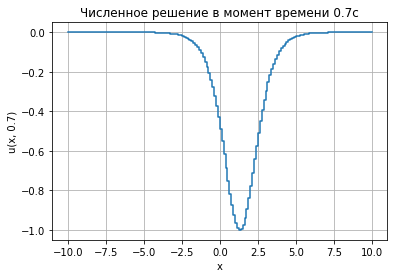

In [79]:
x = np.linspace(-10, 10, 161)
plt.step(x, np.squeeze(sol07_0125))
plt.grid()
plt.xlabel('x')
plt.ylabel('u(x, 0.7)')
plt.title('Численное решение в момент времени 0.7c')

### Анализ полученных решений

In [108]:
#для h = 0.5
#отклонение от h = 1
dev05 = max_error(sol1, sol07_05[::2])
print(dev05)

0.14603548973882957


In [99]:
#для h = 0.25
#отклонение от h = 0.5
dev025 = max_error(sol07_05, sol07_025[::2])
print(dev025)

0.0153048513433941


In [101]:
#для h = 0.25
#отклонение от h = 0.5
dev0125 = max_error(sol07_025, sol07_0125[::2])
print(dev0125)

0.004223299140367787


В то же время реальные отклонения от точных решений:

In [110]:
#для h = 1
print(max_error(one_solit(np.linspace(-10, 10, 21), 0.7), sol1))

0.16360505703005934


In [111]:
#для h = 0.5
print(max_error(one_solit(np.linspace(-10, 10, 41), 0.7), sol07_05))

0.019907655989813033


In [112]:
#для h = 0.25
print(max_error(one_solit(np.linspace(-10, 10, 81), 0.7), sol07_025))

0.005498819373084385


In [113]:
#для h = 0.125
print(max_error(one_solit(np.linspace(-10, 10, 161), 0.7), sol07_0125))

0.001291715217790368
